# Error propagation

In [1]:
#%%
# Import necessary libraries
import autograd.numpy as np
from ml_uncertainty.error_propagation.error_propagation import ErrorPropagation
import matplotlib.pyplot as plt


def arrhenius_model(T, coefs_):
    r"""Arrhenius model function for rate of reaction prediction.

    $$ k = Ae^{-Ea/RT}$$

    Source: https://chem.libretexts.org/Bookshelves/
    Physical_and_Theoretical_Chemistry_Textbook_Maps/
    Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/
    Kinetics/06%3A_Modeling_Reaction_Kinetics/
    6.02%3A_Temperature_Dependence_of_Reaction_Rates/
    6.2.03%3A_The_Arrhenius_Law/6.2.3.01%3A_Arrhenius_Equation

    Parameters:
    -----------
    T: np.ndarray of dimension 1
        Temperatures in $\degree C$
    coefs_: np.ndarray of shape (2,)
        Denotes [A, Ea].
        A (units: same as those of rate constant k),
        Ea (units: J/mol).

    Returns:
    --------
    np.ndarray of dimension 1.
        Corresponding to k values for each T value.
    """

    X = T[:, 0] + 273  # transforming to K
    R = 8.314  # J/mol/K
    A, Ea = coefs_
    k = A * np.exp(-Ea / (R * X))
    k = k.reshape((-1,))
    return k


<ErrorbarContainer object of 3 artists>

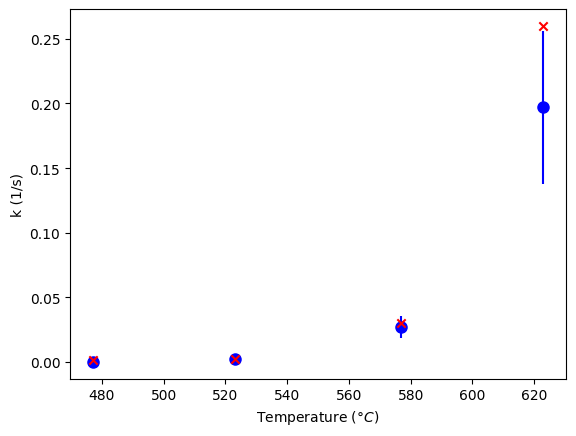

In [2]:
#%%
# Let's say we use the data provided in the link below to study
# the rate of reaction for conversion of cyclopropane to propene.
# https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Kinetics/06%3A_Modeling_Reaction_Kinetics/6.02%3A_Temperature_Dependence_of_Reaction_Rates/6.2.03%3A_The_Arrhenius_Law/6.2.3.01%3A_Arrhenius_Equation

# The data provided is as follows: ($\degree C$)
T_expt = np.array([477, 523, 577, 623])

# For these values, the experimental k values are as follows: (1/s)
k_expt = np.array([0.0018, 0.0027, 0.030, 0.26])

# Let's say the model parameters are calculated
# as shown in source. Ea: provided, A: calculated accordingly.
# A: 1/s, Ea: J/mol
best_fit_params = np.array([1.39406453358858e15, 271.867e3])

# Let's assume the standard errors in these parameters to be 0.5% of their
# value.
# QUESTION: How does this affect the uncertainty of the outputs?
best_fit_err = best_fit_params * 0.5 / 100

# Supply it an estimate of RMSE (estimate of $\sigma$).
sigma_hat = 0.0001

# Let us take some T values between 460 - 630 C.
T = T_expt.reshape((-1, 1))

# Compute the predictions and prediction intervals
# Initialize the error propagation class
eprop = ErrorPropagation()

# Propagate errors
df_int = eprop.get_intervals(
    arrhenius_model,
    T,
    best_fit_params,
    params_err=best_fit_err,
    sigma=sigma_hat,
    side="two-sided",
    confidence_level=90.,
    distribution="normal",
)

# Plot the predictions versus experimental values.
plt.figure()
plt.xlabel(r"Temperature ($\degree C$)")
plt.ylabel(r"k (1/s)")

# Showing experimental points.
plt.scatter(T, k_expt, marker="x", color="red", zorder=1)

# Show the predicted values and their prediction intervals.
plt.errorbar(
    T[:, 0],
    df_int["mean"],
    yerr=(
        df_int["mean"] - df_int["lower_bound"],
        df_int["upper_bound"] - df_int["mean"],
    ),
    marker="o",
    markersize="8",
    ls="none",
    zorder=0.3,
    color="blue",
)


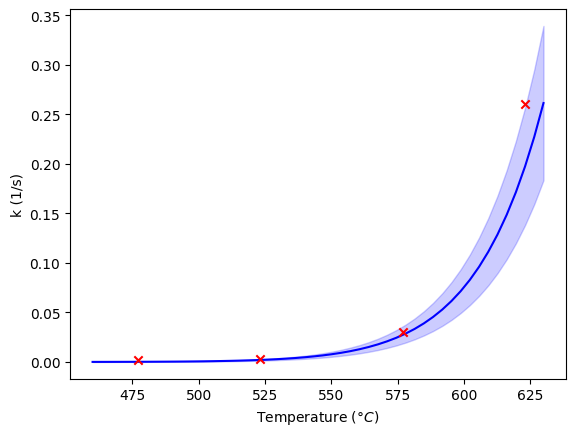

In [3]:
#%%
# Additionally, let us show the predictions and prediction errors at
# all the intermediate points.

T_add = np.linspace(460, 630, 50).reshape((-1, 1))

# Propagate errors
df_int_add = eprop.get_intervals(
    arrhenius_model,
    T_add,
    best_fit_params,
    params_err=best_fit_err,
    sigma=sigma_hat,
    side="two-sided",
    distribution="normal",
)

plt.figure()
plt.xlabel(r"Temperature ($\degree C$)")
plt.ylabel(r"k (1/s)")

# Showing experimental points.
plt.scatter(T, k_expt, marker="x", color="red", zorder=1)

# Shoring intermediate points.
plt.plot(T_add[:, 0], df_int_add["mean"], color="blue", zorder=0.2)
plt.fill_between(
    T_add[:, 0],
    df_int_add["lower_bound"],
    df_int_add["upper_bound"],
    color="blue",
    alpha=0.2,
    zorder=0,
)


# %%
